# Project One

Team Members:





Project Description 

# Initial Code

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

## Get data 

In [2]:
climate_df = pd.read_csv("climate_data.csv")
energy_df = pd.read_csv("energy_data.csv")
energy_cost_df = pd.read_csv("Tariffs_n_dates.csv")
production_df = pd.read_csv("production_data.csv")

# Unpivot raw energy data.
energy_df = energy_df.melt(id_vars=['Time stamp'],
                     var_name='device',
                     value_name='energy')
energy_df = energy_df.sort_values("Time stamp")

## Merge hourly data 

In [3]:
# Energy and Cost data
hourly_data = pd.merge(energy_df, energy_cost_df, how='left',
                      on="Time stamp")
hourly_data = hourly_data[["Time stamp",  "Date", "device", "energy","Price"]]
hourly_data["Total Cost"] = (hourly_data["energy"] 
                             * hourly_data["Price"])
hourly_data = hourly_data.drop("Price", axis=1)
hourly_data = hourly_data.sort_values("Date")
hourly_data.head()

,Time stamp,Date,device,energy,Total Cost
0,01/01/2020 00:00,01/01/2020,COMP_REF1,0.0000,0.000000
195,01/01/2020 16:00,01/01/2020,COMP_REF9,1.4900,2.474294
194,01/01/2020 16:00,01/01/2020,TUNEL1,0.1372,0.227834
193,01/01/2020 16:00,01/01/2020,TUNEL3,0.2318,0.384927
192,01/01/2020 16:00,01/01/2020,COMP_REF4,0.2772,0.460318


## Daily data 

In [4]:
# Energy, Production, Climate and Cost data
daily_data = hourly_data.groupby(by=["Date","device"], as_index=False).sum()
daily_data = pd.merge(daily_data, production_df, 
                      how='left', on='Date')
daily_data = pd.merge(daily_data, climate_df, 
                      how='left', on='Date')
daily_data["Date"] = pd.to_datetime(daily_data["Date"], dayfirst=True,  format="%d/%m/%Y")
daily_data.sort_values(by="Date", inplace=True)
daily_data.reset_index(drop=True, inplace=True)
daily_data.head()

,Date,device,energy,Total Cost,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
0,2019-03-01,COMP_REF1,6162.9256,8663.348872,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
1,2019-03-01,TUNEL3,5078.9900,7288.358004,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2,2019-03-01,TUNEL2,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
3,2019-03-01,TUNEL1,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
4,2019-03-01,COMP_REF9,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0


# Analysis 

## What are the main climate variables that affect the factory production? 

In [5]:
# José/Jorge

In [6]:
# Graficar producto A y B VS Climate 

In [7]:
from scipy.stats import linregress

In [8]:
def scatter_plot(xvalues, yvalues, zvalues):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    (slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(xvalues, zvalues)
    regress_values = xvalues * slope + intercept
    regress_values_z = xvalues * slope2 + intercept2
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    line_eq_2 = "z = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
    plt.plot(xvalues,regress_values,"r-")
    plt.plot(xvalues,regress_values_z,"b-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="red")
    plt.annotate(line_eq_2,(lim_x_annot,yvalues.max()/3*2),fontsize=15,color="blue")
    plt.scatter(xvalues, yvalues, color="red", alpha=0.5)
    plt.scatter(xvalues, zvalues, color="blue", alpha=0.5)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)

In [9]:
grouped_data = daily_data.groupby("Date")[["Product_A","Product_B","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()

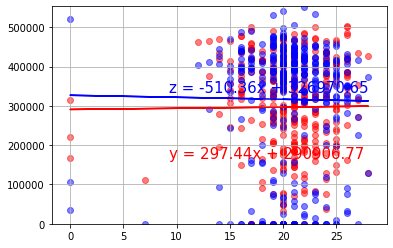

In [10]:
x_values = grouped_data["Temp"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.show()

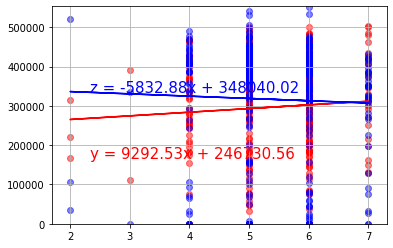

In [11]:
x_values = grouped_data["UV"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.show()

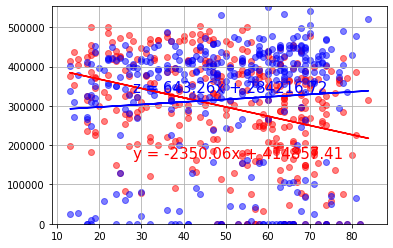

In [12]:
x_values = grouped_data["Hum"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.show()

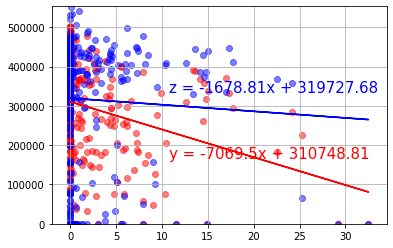

In [13]:
x_values = grouped_data["PrecMM"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.show()

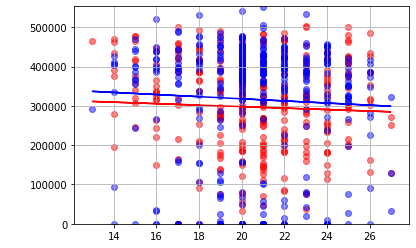

In [14]:
x_values = grouped_data["Heat"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.show()

## What are the main climate variables that affect the energy consumption?

In [15]:
# José/Jorge

In [16]:
# Graficar devices VS climate

## How is it correlated the production and the energy consumption?

In [17]:
# Luis

In [18]:
# Graficas de scatter, correlación y regresión

## Define the energy consumption curve for each month of the year. 

In [19]:
# Luis

## Define the energy consumption curve for each season of the year.

In [20]:
# Lupita

## For each group of devices, rank them by cost.


In [21]:
# Lupita

## Anual base line for each device.  

In [22]:
# Daniel

## Make production recommendations, based on the optimal production. 

In [23]:
# Daniel